In [7]:
import numpy as np

# Define the activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)


In [18]:
# Define the gNN class
class GeneralizedNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.bias2 = np.zeros((1, output_size))
    
    def forward(self, X):
        self.hidden_layer = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2) + self.bias2)
        return self.output_layer

# Define the input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the gNN model
model = GeneralizedNeuralNetwork(input_size=2, hidden_size=50, output_size=1)

# Training loop
epochs = 100000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward propagation
    output = model.forward(X)
    
    # Backpropagation
    error = y - output
    d_output = error * output * (1 - output)
    
    error_hidden = np.dot(d_output, model.weights2.T)
    d_hidden = error_hidden * model.hidden_layer * (1 - model.hidden_layer)
    
    # Update weights and biases
    model.weights2 += learning_rate * np.dot(model.hidden_layer.T, d_output)
    model.weights1 += learning_rate * np.dot(X.T, d_hidden)
    model.bias2 += learning_rate * np.sum(d_output, axis=0, keepdims=True)
    model.bias1 += learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

# Testing the model
output = model.forward(X)
print("Output:", output)


Output: [[0.00584132]
 [0.99312917]
 [0.99303122]
 [0.00789753]]


In [2]:

# # ReLU activation function
# def relu(x):
#     return np.maximum(0, x)

# # Test the ReLU function
# x = np.array([-2, -1, 0, 1, 2])
# output = relu(x)
# print("Output:", output)

Output: [0 0 0 1 2]


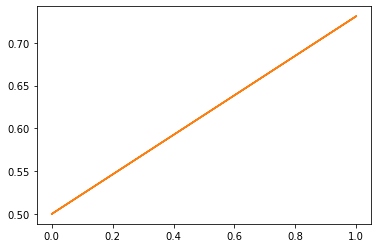

In [6]:
import matplotlib.pyplot as plt

plt.plot(X, sigmoid(X))